**Seoul Bike Sharing Demand
Donated on 2/29/2020**
link: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

**Dataset Information**
Additional Information

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

In [13]:
from google.colab import drive
from IPython.display import Image
upload = files.upload()

drive.mount('/content/drive')

Saving data.jpg to data.jpg
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


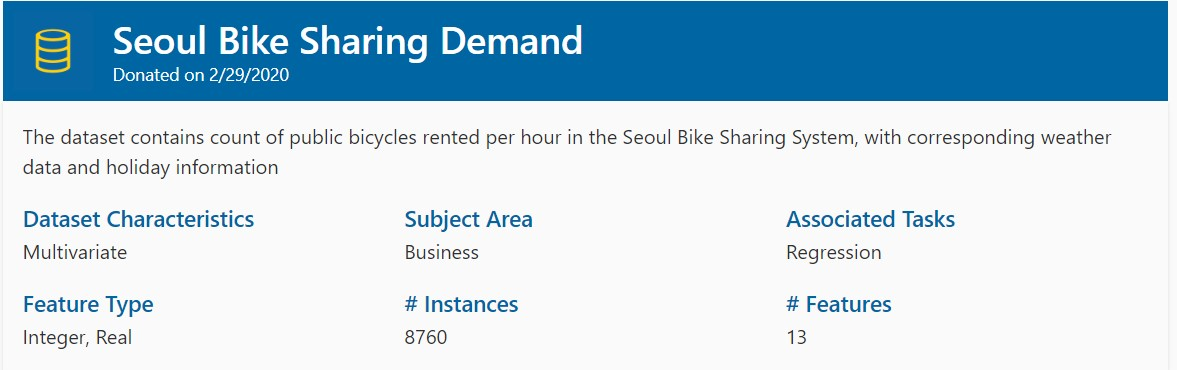

In [29]:
Image("data.jpg")

Importing pandas and numpy

In [1]:
import pandas as pd
import numpy as np

In [46]:
import chardet

with open('SeoulBikeData.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
#first failed to read the initial encoding, this code helped from stackoverflow https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file

data = pd.read_csv('SeoulBikeData.csv', encoding=result['encoding'])

Data Set successfully Loaded


In [16]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [25]:
#count of missing values in each column.
data.isna().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


This dataset has 14 features (columns) and 8760 rows.

'Rented Bike Count' is the key attribute for this set

The data does not have any null values

In [27]:
# Checking Duplicate Values
duplicates =len(data[data.duplicated()])
print(duplicates)

0


In [61]:
data.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),hour,year,month
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.0,2017.915068,6.526027
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.0,2017.000000,1.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.0,2018.000000,4.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.0,2018.000000,7.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.0,2018.000000,10.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,0.0,2018.000000,12.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.0,0.278796,3.448048



**QUESTIONS WE HAVE TO ANSWER**

1. What are we trying to predict ?
2. Which season has the most rentals ?
3. In which month or day are most rentals ?
4. Which attribute has the biggest effect on our variable?


# **Exploratory Data Analysis**

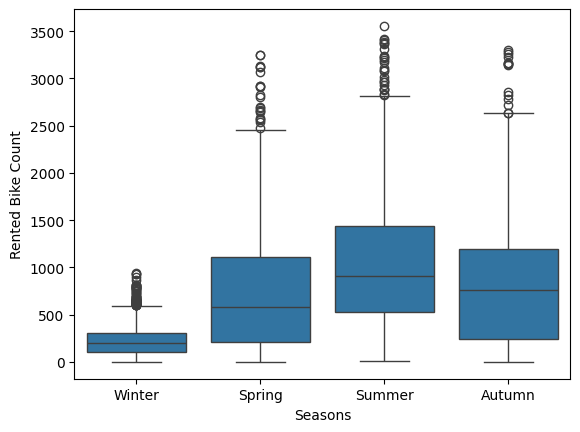

In [71]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.boxplot(x='Seasons', y='Rented Bike Count', data=data)
plt.show()

In [54]:
import datetime as dt
#data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [56]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

data['day'] = data['Date'].dt.day_name()


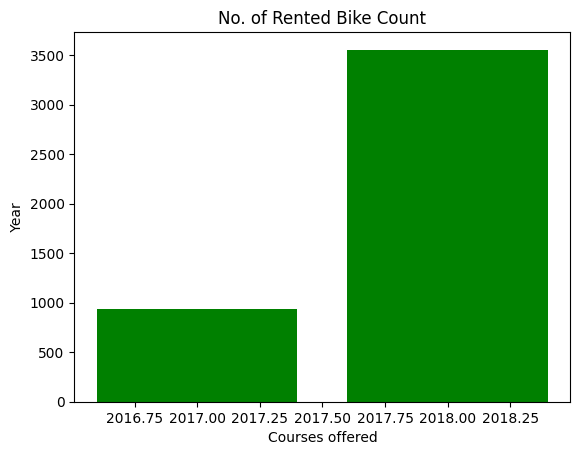

In [70]:
plt.bar(x='year', height='Rented Bike Count', data=data, color ='green', )

plt.xlabel(" Rented Bike")
plt.ylabel(" Year ")
plt.title("No. of Rented Bike Count")
plt.show()

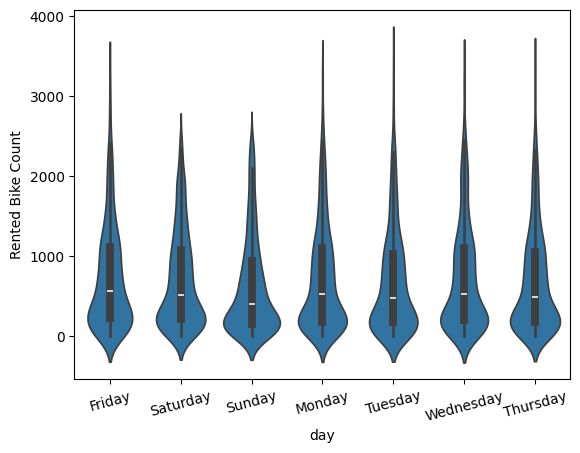

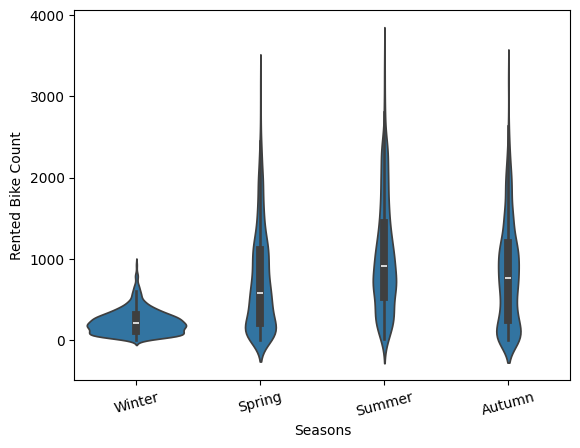

In [77]:
sb.violinplot(data=data, x='day', y='Rented Bike Count') # Comparing days
plt.xticks(rotation=15);
plt.show()
sb.violinplot(data=data, x='Seasons', y='Rented Bike Count') # Comparing seasons
plt.xticks(rotation=15);
plt.show()

Summer is the peak season